In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score

In [3]:
data = pd.read_csv('C:\\Users\\pc\\Desktop\\jupyter_notebook\\salary_predict.csv')

In [4]:
data.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [5]:
data.shape

(397, 6)

In [6]:
data.rename(columns = {'yrs.since.phd':'phd', 'yrs.service':'service'}, inplace = True)

In [7]:
data.describe()

,phd,service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [8]:
data.corr()

,phd,service,salary
phd,1.000000,0.909649,0.419231
service,0.909649,1.000000,0.334745
salary,0.419231,0.334745,1.000000


In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le = LabelEncoder()

In [11]:
data['sex'] = le.fit_transform(data['sex'])

In [12]:
le.inverse_transform([0,1])

array(['Female', 'Male'], dtype=object)

In [13]:
ld = LabelEncoder()

In [14]:
data['rank'] = ld.fit_transform(data['rank'])

In [15]:
ld.inverse_transform([0,1,2])

array(['AssocProf', 'AsstProf', 'Prof'], dtype=object)

In [16]:
lc = LabelEncoder()

In [17]:
data['discipline'] = lc.fit_transform(data['discipline'])

In [18]:
lc.inverse_transform([0,1])

array(['A', 'B'], dtype=object)

In [19]:
data['rank'].value_counts()

2    266
1     67
0     64
Name: rank, dtype: int64

In [20]:
data['sex'].value_counts()

1    358
0     39
Name: sex, dtype: int64

rank has imbalance data

In [21]:
data.describe()

,rank,discipline,phd,service,sex,salary
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,1.508816,0.544081,22.314861,17.614610,0.901763,113706.458438
std,0.757486,0.498682,12.887003,13.006024,0.298010,30289.038695
min,0.000000,0.000000,1.000000,0.000000,0.000000,57800.000000
25%,1.000000,0.000000,12.000000,7.000000,1.000000,91000.000000
50%,2.000000,1.000000,21.000000,16.000000,1.000000,107300.000000
75%,2.000000,1.000000,32.000000,27.000000,1.000000,134185.000000
max,2.000000,1.000000,56.000000,60.000000,1.000000,231545.000000


In [22]:
data.isna().sum()

rank          0
discipline    0
phd           0
service       0
sex           0
salary        0
dtype: int64

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   rank        397 non-null    int32
 1   discipline  397 non-null    int32
 2   phd         397 non-null    int64
 3   service     397 non-null    int64
 4   sex         397 non-null    int32
 5   salary      397 non-null    int64
dtypes: int32(3), int64(3)
memory usage: 14.0 KB


# remove outliers

In [24]:
df_features = data.drop(['rank'],axis=1)

In [25]:
import warnings
warnings.filterwarnings('ignore')

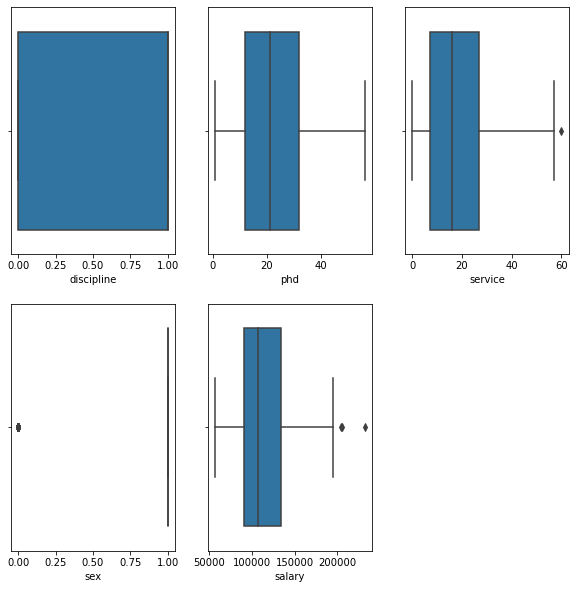

In [26]:
plt.figure(figsize=(10,10))
graph = 1
for column in df_features:
    if graph<=6:
        ax = plt.subplot(2,3,graph)
        sns.boxplot(df_features[column],orient='v')
        plt.xlabel(column,fontsize=10)
        
        
        
        graph+=1
plt.show()

In [27]:
q1 = data.quantile(0.25)
#2nd quantile
q3 = data.quantile(0.75)
#iqr
iqr = q3-q1


In [28]:
iqr

rank              1.0
discipline        1.0
phd              20.0
service          20.0
sex               0.0
salary        43185.0
dtype: float64

In [29]:
service_high = (q3.salary + 1.5*iqr.salary)

In [30]:
service_high

198962.5

In [31]:
index = np.where(data['service']>service_high)

In [32]:
index

(array([], dtype=int32),)

In [33]:
data.shape

(397, 6)

In [34]:
from scipy.stats import zscore

In [35]:
z = np.abs(zscore(data))
threshold=3
np.where(z>3)

(array([  9,  19,  24,  34,  35,  43,  47,  48,  52,  63,  68,  84,  90,
        103, 114, 119, 123, 127, 131, 132, 133, 148, 153, 179, 186, 218,
        230, 231, 233, 237, 245, 253, 254, 274, 316, 323, 330, 332, 334,
        341, 358, 361, 364], dtype=int32),
 array([4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 5],
       dtype=int32))

In [36]:
df_new_z = data[(z<3).all(axis=1)]
df_new_z

,rank,discipline,phd,service,sex,salary
0,2,1,19,18,1,139750
1,2,1,20,16,1,173200
2,1,1,4,3,1,79750
3,2,1,45,39,1,115000
4,2,1,40,41,1,141500
...,...,...,...,...,...,...
392,2,0,33,30,1,103106
393,2,0,31,19,1,150564
394,2,0,42,25,1,101738
395,2,0,25,15,1,95329


In [37]:
x = data.drop(['rank'],axis=1)
y = data['rank']

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()

In [40]:
x_scaled = scaler.fit_transform(x)

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25)

In [43]:
from sklearn.utils import resample


In [51]:
x = pd.concat([x_train,y_train])

TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid

In [ ]:
AssocProf= x[x.rank==0]
AsstProf=x[x.rank==1]
Prof = x[x.rank==2]

In [ ]:
upsampled = resample(AssocProf,
                    inplace=True,
                    n_samples=len(Prof),
                    random_state=10)

In [ ]:
sampled = pd.concat(Prof,upsampled)

In [ ]:
sampled.rank.value_counts()

In [ ]:
y_train.head()

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lm = LogisticRegression()
lm.fit(x_train,y_train)

In [ ]:
x_scaled.shape[1]

In [ ]:
vif  = pd. DataFrame()

In [ ]:
vif['vif'] = [variance_inflation_factor(x_scaled,i)for i in range(x_scaled.shape[1])]

In [ ]:
vif["features"] = x.columns

In [ ]:
vif

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=1)

In [ ]:
log_reg = LogisticRegression()

In [ ]:
log_reg.fit(x_train,y_train)

In [ ]:
y_pred = log_reg.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test,y_pred)

In [ ]:
accuracy

In [ ]:
con_mat = confusion_matrix(y_test,y_pred)

In [ ]:
con_mat

# similarly you can manually calculated precision recall and f1score


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
y_pred = log_reg.predict([[0,11,8,1,104121]])

In [ ]:
data.tail(20)

In [ ]:
y_pred